In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy import stats
import math

In [4]:
train = pd.read_csv('TrainClean.csv',index_col=0)
test = pd.read_csv('TestClean.csv',index_col=0)

In [5]:
bool_cols = [col for col in train if train[col].dropna().value_counts().index.isin([0,1]).all()]

In [6]:
binary = pd.Index(bool_cols)

In [7]:
continous_variables = train.columns.difference(binary)
continous_variables = continous_variables.drop('CloudCover')

In [8]:
ordinal_variables = pd.Index(['CloudCover'])

# Features selection with PCA

In [7]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn import model_selection

In [8]:
variables = continous_variables.drop('NumberOfCustomers')
variables = variables.drop('NumberOfSales')
target = 'NumberOfCustomers'

In [9]:
X = train[variables]
X_t = test[variables]
y = train[target]

In [10]:
X = stats.zscore(X)
X_t = stats.zscore(X_t)

In [11]:
full_pca_model = PCA()
full_fitted_model = full_pca_model.fit(X)

Text(0,0.5,'Cumulative Explained Variance Ratio')

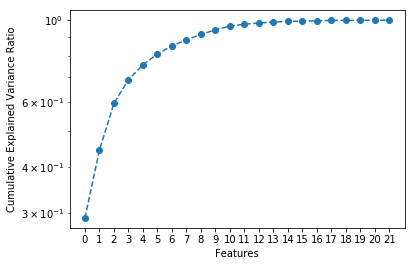

In [12]:
plt.semilogy(full_fitted_model.explained_variance_ratio_.cumsum(), '--o');
plt.xticks(np.arange(0,X.shape[1],1));
plt.xlabel("Features")
plt.ylabel("Cumulative Explained Variance Ratio")

In [13]:
feature_selection_pca_model = PCA(n_components=10)
fitted_model = feature_selection_pca_model.fit(X)


X_selected_features_pca = fitted_model.transform(X)
X_t_selected_features_pca = fitted_model.transform(X_t)
print("Explained Variance: %s" % fitted_model.explained_variance_ratio_)

Explained Variance: [0.29114707 0.15353017 0.1505899  0.09473259 0.06724201 0.05302516
 0.04195381 0.03231535 0.03058866 0.02701623]


In [14]:
train_pca_df = pd.DataFrame(data=X_selected_features_pca)
for b in binary:
    train_pca_df[b] = train.loc[:,b].values
for o in ordinal_variables:
    train_pca_df[o] = train.loc[:,o].values

In [15]:
test_pca_df = pd.DataFrame(data=X_t_selected_features_pca)
for b in binary:
    test_pca_df[b] = test.loc[:,b].values
for o in ordinal_variables:
    test_pca_df[o] = test.loc[:,o].values

In [16]:
rfr = RandomForestRegressor(oob_score=True,min_samples_leaf=5,random_state=1234) #keep increase min_samples
rfr.set_params(n_estimators=50)
rfr.fit(train_pca_df, y)
cust = rfr.predict(test_pca_df)
r2 = rfr.oob_score_

In [17]:
r2

0.44621466163325363

In [26]:
test_pca_df['NumberOfCustomers'] = cust

In [18]:
test_pca_df.shape

(37586, 56)

In [23]:
NumberOfSales = train['NumberOfSales']

In [25]:
rfr = RandomForestRegressor(oob_score=True,min_samples_leaf=5,random_state=1234) #keep increase min_samples
rfr.set_params(n_estimators=50)
rfr.fit(train_pca_df, NumberOfSales)
sales = rfr.predict(test_pca_df)
r2 = rfr.oob_score_

KeyboardInterrupt: 

In [ ]:
r2

# Double Regression

In [9]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn import model_selection

In [10]:
target = train['NumberOfCustomers']
variables = train.drop(labels='NumberOfCustomers',axis=1)
variables = variables.drop(labels='NumberOfSales', axis=1)

In [11]:
test = test.drop(labels='StoreID',axis=1)

In [12]:
rfr = RandomForestRegressor(oob_score=True,min_samples_leaf=5,random_state=1234) #keep increase min_samples
rfr.set_params(n_estimators=50)
rfr.fit(variables, target)
cust = rfr.predict(test) #test or variables?
r2 = rfr.oob_score_

In [13]:
r2

0.849833965847126

In [14]:
test['NumberOfCustomers'] = cust

ValueError: Length of values does not match length of index

In [ ]:
variables['NumberOfCustomers'] = target
NumberOfSales = train['NumberOfSales']

In [ ]:
rfr = RandomForestRegressor(oob_score=True,min_samples_leaf=5,random_state=1234) #keep increase min_samples
rfr.set_params(n_estimators=50)
rfr.fit(variables, NumberOfSales)
sales = rfr.predict(test) #test or variables?
r2 = rfr.oob_score_

In [ ]:
r2